### Least-squares filter design


In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sclibrary import dataset_loader, SCPlot


sc, coordinates = dataset_loader.load_paper_data()
# create a plot
scplot = SCPlot(sc, coordinates)

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


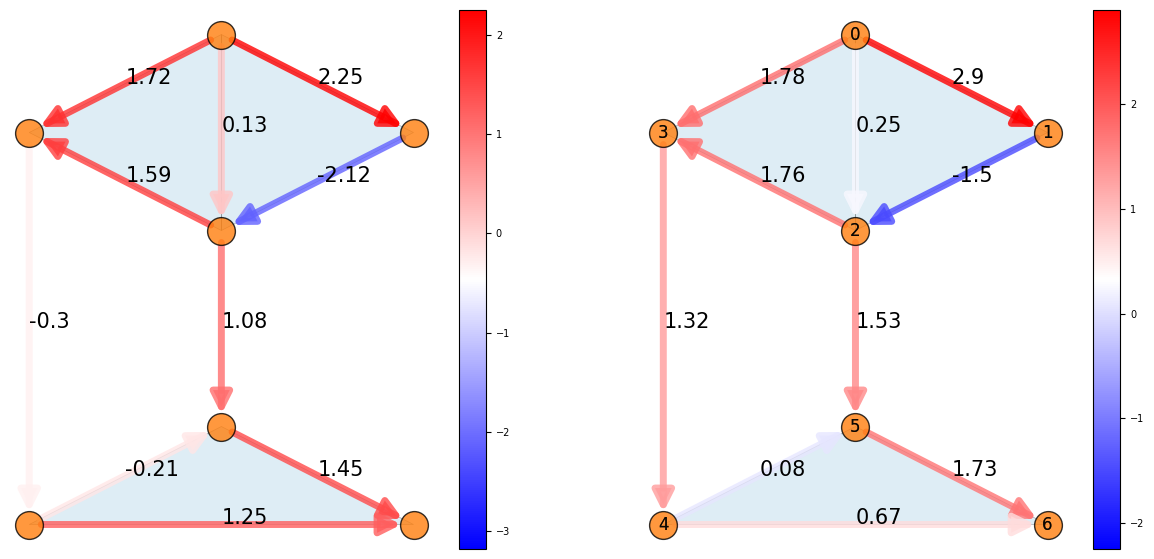

In [3]:
f0 = np.array([
    2.25,
    0.13,
    1.72,
    -2.12,
    1.59,
    1.08,
    -0.30,
    -0.21,
    1.25,
    1.45,
])

f = np.array([
    2.90,
    0.25, 
    1.78,
    -1.50,
    1.76,
    1.53,
    1.32,
    0.08,
    0.67, 
    1.73
])


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
scplot.draw_network(edge_flow=f0, ax=ax1)
scplot.draw_network(edge_flow=f , ax=ax2)

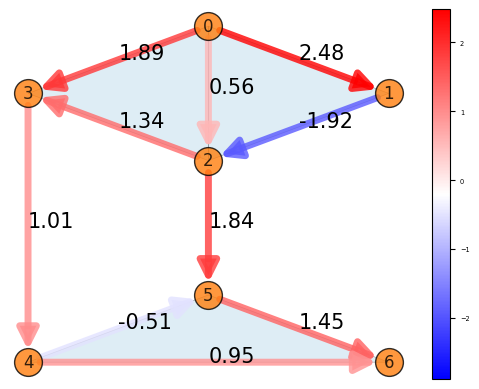

In [4]:
f_g = sc.get_hodgedecomposition(flow=f, component="gradient", round_fig=False)
scplot.draw_network(edge_flow=np.round(f_g, 2))

In [5]:
from sclibrary.filters import LSFilterDesign

lsfilter = LSFilterDesign(simplicial_complex=sc)

#### Subcomponent extraction type I - L1 = L2 = L and α = β

Filter size: 0 - Error: 0.4250482922403702
Filter size: 1 - Error: 0.41523366255347
Filter size: 2 - Error: 0.41904808222399975
Filter size: 3 - Error: 0.41183190590975394
Filter size: 4 - Error: 0.3775256646427312
Filter size: 5 - Error: 0.3523054267573435
Filter size: 6 - Error: 0.3660141601729268
Filter size: 7 - Error: 0.3681407180609075
Filter size: 8 - Error: 0.10490222047872812
Filter size: 9 - Error: 5.669986956917028e-07
Filter size: 10 - Error: 1.7379720487444826e-07
Filter size: 11 - Error: 1.0221393901699875e-06
Filter size: 12 - Error: 2.340256729411591e-06
Filter size: 13 - Error: 5.59957965451337e-07
Filter size: 14 - Error: 1.0185758202410106e-06
Filter size: 15 - Error: 3.3842001469575958e-06
Filter size: 16 - Error: 2.7717348700917783e-05
Filter size: 17 - Error: 6.204775677574004e-05
Filter size: 18 - Error: 0.0005780614942869729
Filter size: 19 - Error: 0.10321674487320381
Filter size: 20 - Error: 0.43915671720651156
Filter size: 21 - Error: 0.4372431645716201
Filte

/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


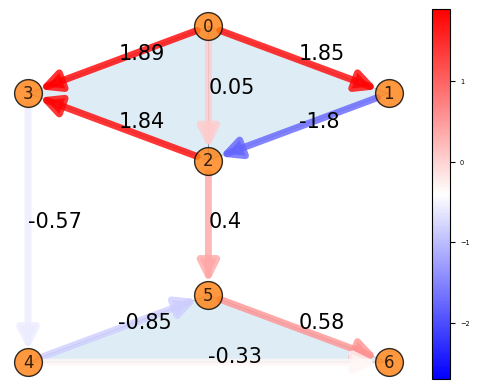

In [6]:
filter_size = 30

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f_g))

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

Filter size: 0 - Error: 0.4250482922403702
Filter size: 1 - Error: 0.41523366255347
Filter size: 2 - Error: 0.41904808222399975
Filter size: 3 - Error: 0.41183190590975394
Filter size: 4 - Error: 0.3775256646427312
Filter size: 5 - Error: 0.3523054267573435
Filter size: 6 - Error: 0.3660141601729268
Filter size: 7 - Error: 0.3681407180609075
Filter size: 8 - Error: 0.10490222047872812
Filter size: 9 - Error: 5.669986956917028e-07
Filter size: 10 - Error: 1.7379720487444826e-07
Filter size: 11 - Error: 1.0221393901699875e-06
Filter size: 12 - Error: 2.340256729411591e-06
Filter size: 13 - Error: 5.59957965451337e-07
Filter size: 14 - Error: 1.0185758202410106e-06
Filter size: 15 - Error: 3.3842001469575958e-06
Filter size: 0 - Error: 1.6043606226735492
Filter size: 1 - Error: 1.6240543767648408
Filter size: 2 - Error: 1.7614748174464911
Filter size: 3 - Error: 1.7488751169485586
Filter size: 4 - Error: 1.7329971214847066
Filter size: 5 - Error: 1.6787836153702989
Filter size: 6 - Error:

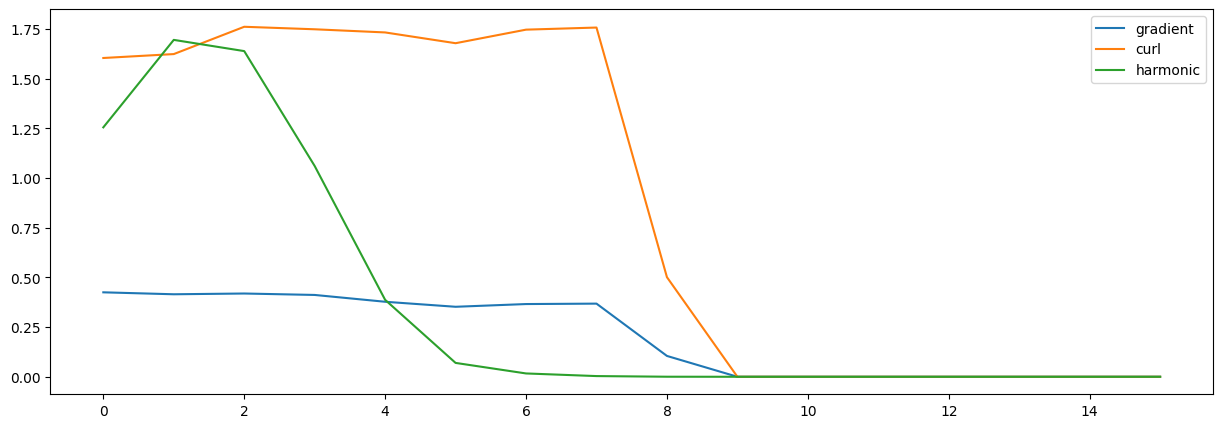

In [7]:
import matplotlib.pyplot as plt

filter_size = 16
plt.figure(figsize=(15, 5))

# gradient
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="gradient", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="gradient")

# curl
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="curl", f=f,
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="curl")

# harmonic 
lsfilter.subcomponent_extraction_type_one(
    L=filter_size, component="harmonic", f=f, 
)
plt.plot(range(filter_size), lsfilter.history["extracted_component_error"], label="harmonic")

plt.legend()

#### Subcomponent extraction type II - L1 != L2 and α != β

Filter size: 0 - Error: 0.25016749791524423
Filter size: 1 - Error: 0.24109539936480018
Filter size: 2 - Error: 0.20246224842395896
Filter size: 3 - Error: 0.1157674029714815
Filter size: 4 - Error: 0.03977124143073698
Filter size: 5 - Error: 0.003184590626459348
Filter size: 6 - Error: 6.564083439823214e-12
Filter size: 7 - Error: 9.500624406727424e-12
Filter size: 8 - Error: 3.4398373617124025e-11
Filter size: 9 - Error: 1.6535236494591194e-10
Filter size: 10 - Error: 1.1369342645307977e-09
Filter size: 11 - Error: 5.267945936986009e-09
Filter size: 12 - Error: 2.7228689957411566e-08
Filter size: 13 - Error: 2.0083330528652735e-07
Filter size: 14 - Error: 1.3656675702094471e-06
Filter size: 15 - Error: 1.116182018882673e-06
Filter size: 16 - Error: 2.8021700018095107e-05
Filter size: 17 - Error: 0.0002476300841726786
Filter size: 18 - Error: 0.0005720755635071239
Filter size: 19 - Error: 0.0013434441065600122
Error: 0.0013434441065600122


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


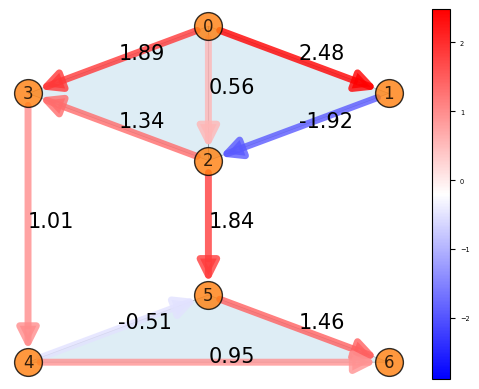

In [8]:
filter_range = 20

lsfilter.subcomponent_extraction_type_two(
    L=filter_range, component="gradient", f=f
)

f_estimated = lsfilter.history["f_estimated"]
print("Error:", lsfilter.calculate_error(f_estimated, f_g))

scplot.draw_network(edge_flow=np.round(f_estimated, 2))

#### General Filter

Filter size: 0 - Error: 0.25016749791524423
Filter size: 0 - Error: 3.6176416762041423
Error: 0.25016749791524423


/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/sclibrary/plot/plot.py:180: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


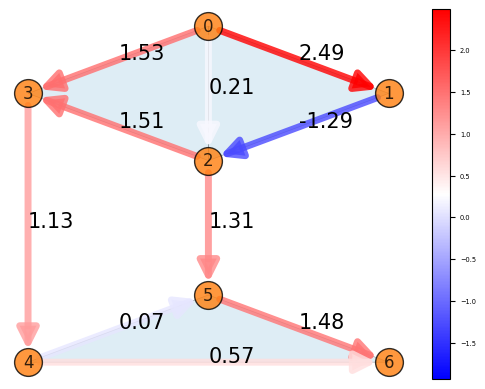

In [9]:
lsfilter = LSFilterDesign(simplicial_complex=sc)

f_est_h, f_est_c, f_est_g = lsfilter.general_filter(
    L1 = 1, L2 = 1, f=f,
)

print("Error:", lsfilter.calculate_error(f_est_g, f_g))

scplot.draw_network(edge_flow=np.round(f_est_g, 2))

In [10]:
lsfilter.history

{'L1': {'filter': array([[0.85714286, 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.85714286, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.85714286, 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.85714286, 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.85714286,
          0.        , 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.85714286, 0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.85714286, 0.        , 0.        , 0.        